In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.classification import *
from hossam.tensor import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-04-16 00:45:46.415594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX

In [3]:
df = my_minmax_scaler(data=origin, yname="MEDV")
my_pretty_table(data=df.head())

+----+-------------+------+-----------+--------+----------+----------+----------+----------+-----------+-----------+-----------+----------+-----------+--------+
|    |        CRIM |   ZN |     INDUS |   CHAS |      NOX |       RM |      AGE |      DIS |       RAD |       TAX |   PTRATIO |        B |     LSTAT |   MEDV |
|----+-------------+------+-----------+--------+----------+----------+----------+----------+-----------+-----------+-----------+----------+-----------+--------|
|  0 |           0 | 0.18 | 0.0678152 |      0 | 0.314815 | 0.577505 | 0.641607 | 0.269203 |         0 |  0.208015 |  0.287234 |        1 | 0.0896799 |     24 |
|  1 | 0.000235923 |    0 |  0.242302 |      0 |  0.17284 | 0.547998 | 0.782698 | 0.348962 | 0.0434783 |  0.104962 |  0.553191 |        1 |   0.20447 |   21.6 |
|  2 | 0.000235698 |    0 |  0.242302 |      0 |  0.17284 | 0.694386 | 0.599382 | 0.348962 | 0.0434783 |  0.104962 |  0.553191 | 0.989737 | 0.0634658 |   34.7 |
|  3 | 0.000292796 |    0 | 0.0630

In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname="MEDV")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [5]:
x_test_vif = my_vif_filter(data=x_test)
my_pretty_table(data=x_test_vif.head())

{'CRIM': 2.1055368501877902, 'ZN': 2.4617153974929273, 'CHAS': 1.3116205689569593, 'NOX': 7.801996391383039, 'RM': 7.901760517773032, 'DIS': 7.499335295156776, 'RAD': 4.557736987658381, 'LSTAT': 6.776141539690266}
+-----+-------------+------+--------+----------+----------+------------+----------+----------+
|     |        CRIM |   ZN |   CHAS |      NOX |       RM |        DIS |      RAD |    LSTAT |
|-----+-------------+------+--------+----------+----------+------------+----------+----------|
| 329 | 0.000684726 |    0 |      0 | 0.154321 | 0.531136 |   0.371468 | 0.130435 | 0.154801 |
| 371 |    0.103698 |    0 |      0 | 0.506173 | 0.508718 | 0.00359192 |        1 | 0.215232 |
| 219 |  0.00121311 |    0 |      1 | 0.339506 | 0.538801 |   0.203121 | 0.173913 | 0.241998 |
| 403 |    0.278694 |    0 |      0 | 0.633745 | 0.342594 |  0.0521238 |        1 | 0.497792 |
|  78 | 0.000563562 |    0 |      0 | 0.106996 | 0.511784 |   0.353236 | 0.173913 |  0.29277 |
+-----+-------------+-----

In [6]:
x_train_vif = x_train[x_test_vif.columns]
my_pretty_table(data=x_train_vif.head())

+-----+-------------+-------+--------+-----------+----------+-----------+----------+----------+
|     |        CRIM |    ZN |   CHAS |       NOX |       RM |       DIS |      RAD |    LSTAT |
|-----+-------------+-------+--------+-----------+----------+-----------+----------+----------|
| 220 |  0.00395381 |     0 |      1 |  0.251029 |  0.64955 |  0.157508 | 0.304348 | 0.220199 |
|  71 |  0.00171339 |     0 |      0 | 0.0576132 | 0.459858 |  0.378079 | 0.130435 |  0.22489 |
| 240 |  0.00120232 |   0.3 |      0 | 0.0884774 | 0.639203 |  0.473452 | 0.217391 |  0.26628 |
|   6 | 0.000921323 | 0.125 |      0 |  0.286008 |  0.46963 |  0.402923 | 0.173913 | 0.295254 |
| 417 |    0.291495 |     0 |      0 |  0.604938 | 0.333972 | 0.0470951 |        1 | 0.687362 |
+-----+-------------+-------+--------+-----------+----------+-----------+----------+----------+


Trial 15 Complete [00h 00m 01s]
val_mae: 21.58025360107422

Best val_mae So Far: 5.440196514129639
Total elapsed time: 00h 00m 23s
+-------+---------+---------+
|       |    loss |     mae |
|-------+---------+---------|
| train | 10.3426 | 2.33841 |
| test  | 18.9424 | 2.76953 |
+-------+---------+---------+


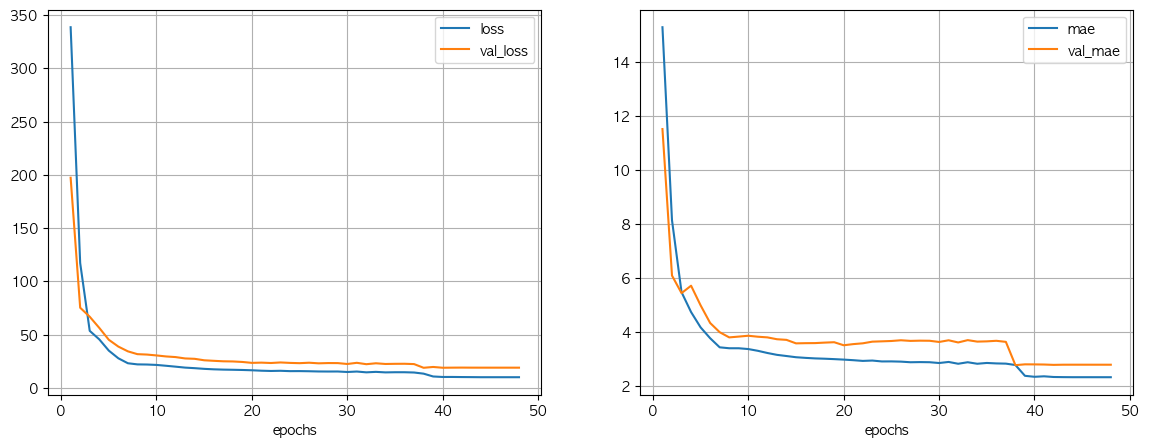

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.878527 |     0.767374 |
| 평균절대오차(MAE)             |      2.33841 |      2.76953 |
| 평균제곱오차(MSE)             |      10.3426 |      18.9424 |
| 평균오차(RMSE)                |        3.216 |      4.35229 |
| 평균 절대 백분오차 비율(MAPE) |      11.6984 |      13.4412 |
| 평균 비율 오차(MPE)           |     -2.25059 |     -1.77025 |
+-------------------------------+--------------+--------------+

[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.10554 |
|  1 | MEDV       | ZN         | 2.46172 |
|  2 | MEDV       | CHAS      

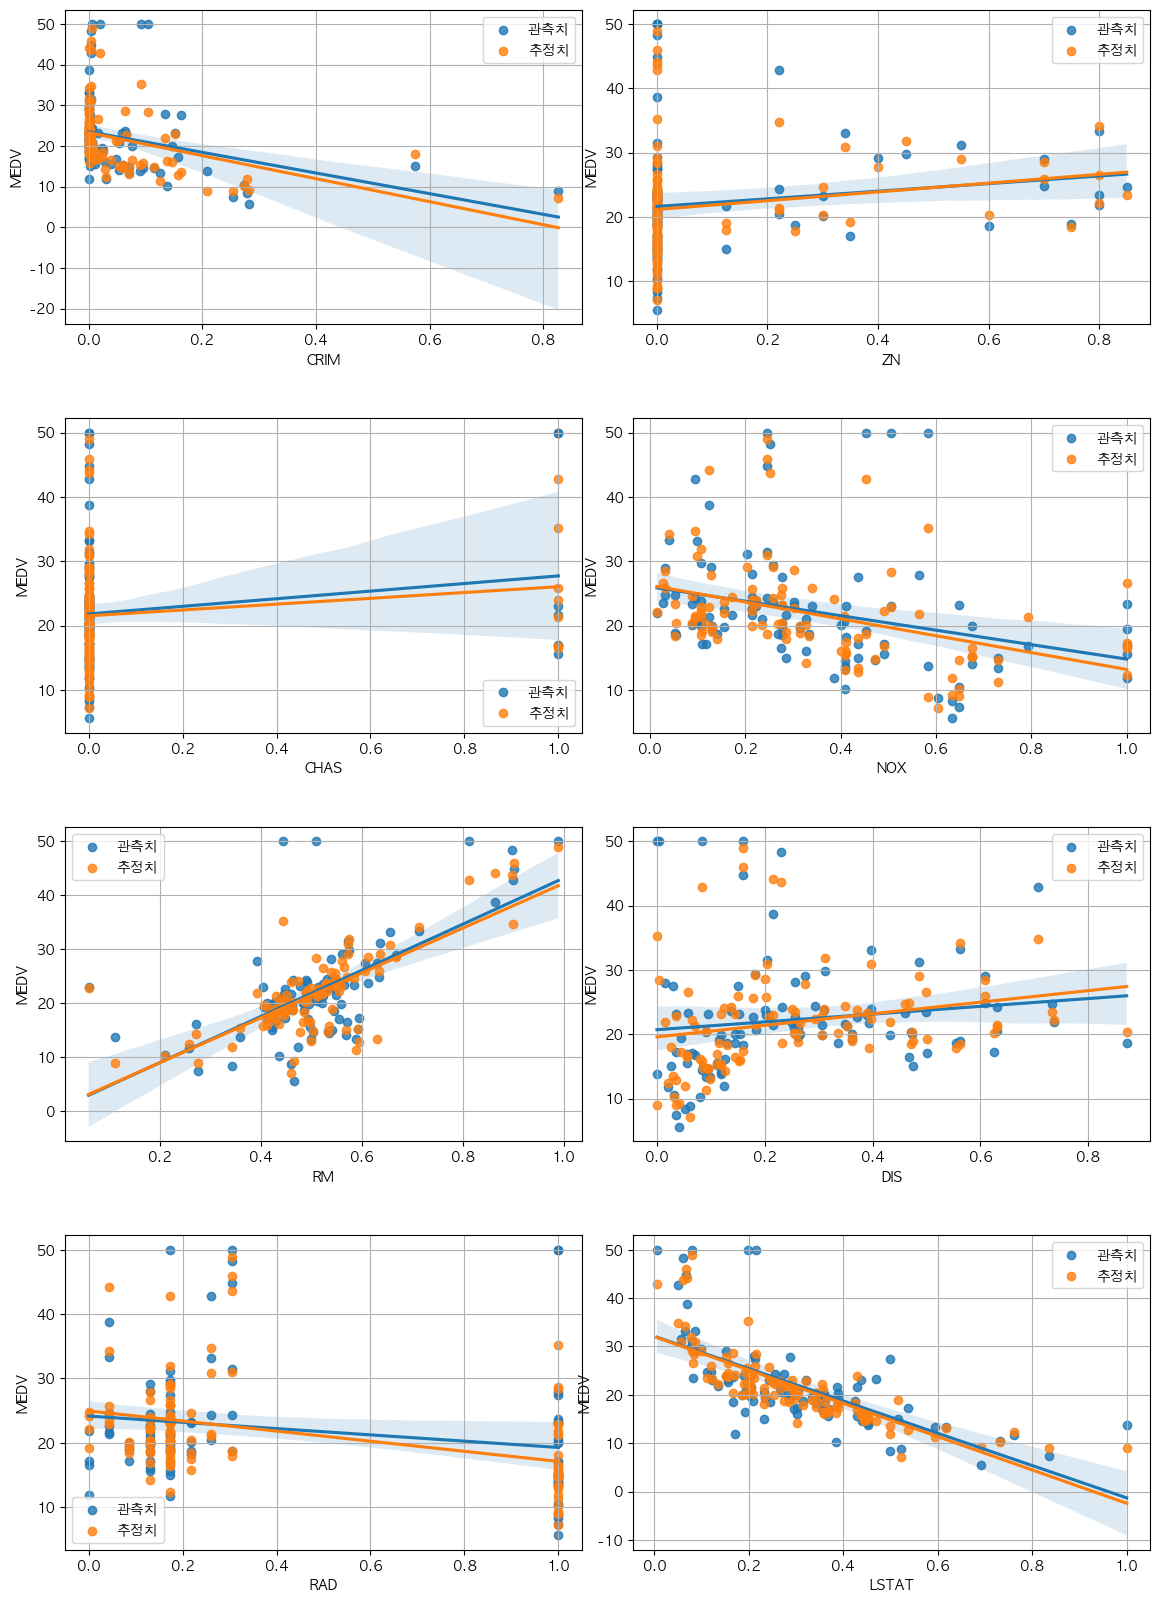

<Sequential name=sequential_1, built=True>

In [7]:
my_tf_linear(x_train=x_train_vif, y_train=y_train, x_test=x_test_vif, y_test=y_test)

In [8]:
df2 = my_poly_features(data=df, ignore=["MEDV"], degree=2)
my_pretty_table(data=df2.head())

+----+-------------+------+-----------+--------+----------+----------+----------+----------+-----------+-----------+-----------+----------+-----------+-------------+-----------+--------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+----------------+-------------+--------------+--------+------------+-----------+-----------+----------+----------+-----------+----------+-----------+--------------+--------+------------+------------+--------------+-------------+------------+-------------+-------------+-------------+-------------+-----------------+-----------+---------------+----------+------------+-----------+------------+------------+------------+------------+----------------+----------+--------------+-----------+-----------+-----------+-----------+------------+-----------+---------------+----------+-------------+----------+----------+----------+-----------+-----------+--------------+----------+------------+----------+-----------+---

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname="MEDV")
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 104), (102, 104), (404,), (102,))

In [10]:
x_test_vif = my_vif_filter(data=x_test)
my_pretty_table(data=x_test_vif.head())

{'CRIM^2': 4.724603503707161, 'CRIM ZN': 3.3823727634078815, 'CRIM DIS': 8.678975911189598, 'CRIM B': 3.557941383284669, 'ZN INDUS': 6.829008625316791, 'ZN CHAS': nan, 'ZN NOX': 3.7150690842583134, 'ZN AGE': 6.73785094577616, 'ZN DIS': 8.294584860419667, 'ZN RAD': 4.970160193560496, 'ZN PTRATIO': 7.597680796710086, 'INDUS DIS': 7.291646797746783, 'CHAS DIS': 3.4946629528965945, 'CHAS RAD': 2.575680508746145, 'CHAS LSTAT': 6.036802370003439, 'NOX^2': 3.5751482070794154, 'NOX RAD': 8.29607696955028, 'RM^2': 3.5742116651167177, 'DIS TAX': 9.561254485497292, 'DIS LSTAT': 7.9627708197978855, 'PTRATIO^2': 5.628630064806355, 'LSTAT^2': 4.500687472521204}
+-----+-------------+-----------+-------------+-------------+------------+-----------+----------+----------+----------+----------+--------------+-------------+------------+------------+--------------+-----------+-----------+----------+------------+-------------+-------------+-----------+
|     |      CRIM^2 |   CRIM ZN |    CRIM DIS |      CR

In [11]:
x_train_vif = x_train[x_test_vif.columns]
my_pretty_table(data=x_train_vif.head())

+-----+-------------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+--------------+-------------+------------+------------+--------------+------------+------------+----------+-----------+-------------+-------------+-----------+
|     |      CRIM^2 |     CRIM ZN |    CRIM DIS |      CRIM B |   ZN INDUS |   ZN CHAS |    ZN NOX |    ZN AGE |    ZN DIS |    ZN RAD |   ZN PTRATIO |   INDUS DIS |   CHAS DIS |   CHAS RAD |   CHAS LSTAT |      NOX^2 |    NOX RAD |     RM^2 |   DIS TAX |   DIS LSTAT |   PTRATIO^2 |   LSTAT^2 |
|-----+-------------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+--------------+-------------+------------+------------+--------------+------------+------------+----------+-----------+-------------+-------------+-----------|
| 220 | 1.56326e-05 |           0 | 0.000622757 |  0.00390197 |          0 |         0 |         0 |         0 |

Trial 15 Complete [00h 00m 02s]
val_mae: 22.0626220703125

Best val_mae So Far: 3.9227988719940186
Total elapsed time: 00h 00m 26s
+-------+---------+---------+
|       |    loss |     mae |
|-------+---------+---------|
| train | 4.93824 | 1.66157 |
| test  | 13.4646 | 2.66127 |
+-------+---------+---------+


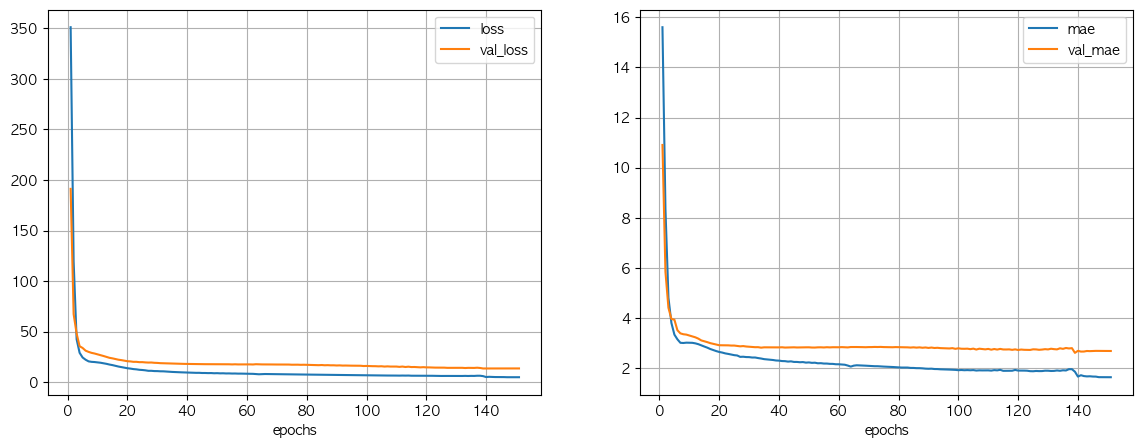

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.942001 |     0.834645 |
| 평균절대오차(MAE)             |      1.66157 |      2.66127 |
| 평균제곱오차(MSE)             |      4.93824 |      13.4646 |
| 평균오차(RMSE)                |      2.22221 |      3.66942 |
| 평균 절대 백분오차 비율(MAPE) |      8.50696 |      13.6624 |
| 평균 비율 오차(MPE)           |     -1.66602 |      -3.6452 |
+-------------------------------+--------------+--------------+

[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM^2     |  4.7246 |
|  1 | MEDV       | CRIM ZN    | 3.38237 |
|  2 | MEDV       | CRIM DIS 

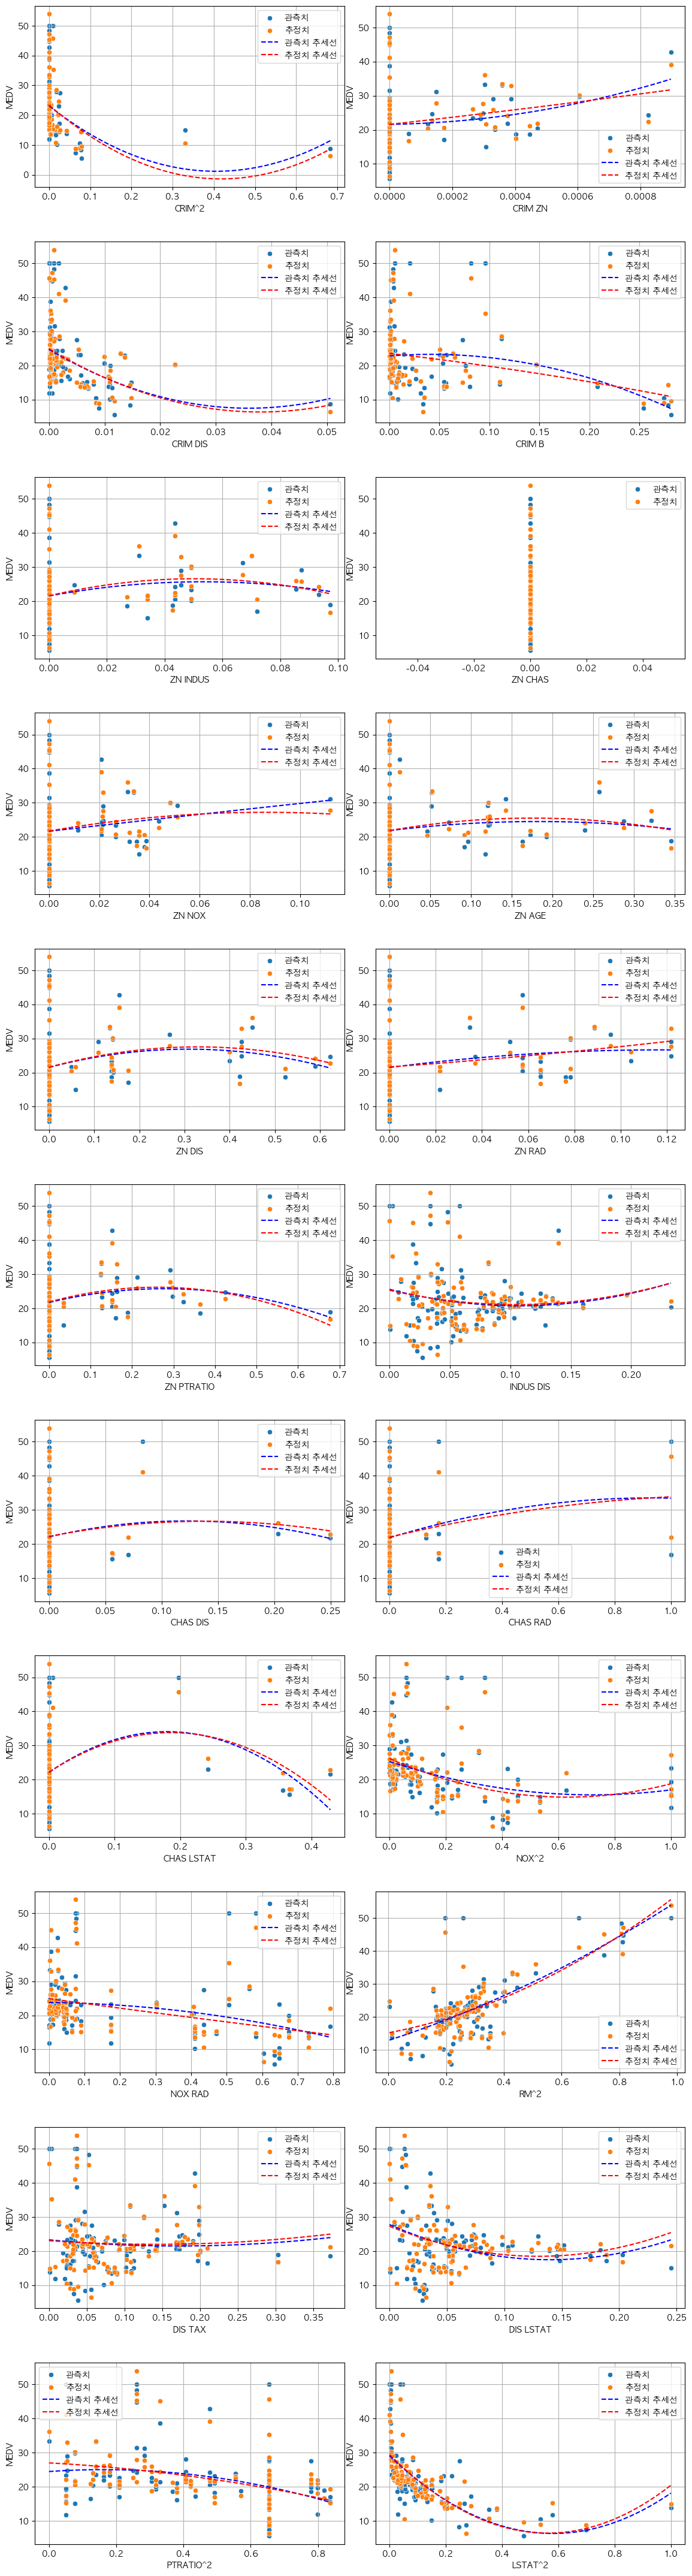

<Sequential name=sequential_1, built=True>

In [12]:
my_tf_linear(
    x_train=x_train_vif, y_train=y_train, x_test=x_test_vif, y_test=y_test, deg=2
)